In [1]:

import pandas as pd

medical_dataset=pd.read_csv('medical_data.csv') 

medical_dataset

fever  cough  tiredness  headache  stuffy nose  runny nose  sneezing  \
0         1      1          1         0            0           0         0   
1         0      1          1         1            0           0         0   
2         1      1          1         0            0           0         0   
3         1      1          1         0            0           0         0   
4         1      1          1         0            0           0         0   
...     ...    ...        ...       ...          ...         ...       ...   
1995      0      1          0         0            1           0         1   
1996      0      0          0         1            1           1         1   
1997      0      0          1         0            1           0         0   
1998      0      0          0         0            1           0         0   
1999      0      1          0         0            0           0         1   

      sore throat    diagnosis  
0               0      covid19  
1               0      covid19  
2               0      covid19  
3               0      covid19  
4               0      covid19  
...           ...          ...  
1995            1  common cold  
1996            0  common cold  
1997            1  common cold  
1998            1  common cold  
1999            1  common cold  

[2000 rows x 9 columns]

In [2]:
set(medical_dataset['diagnosis'])

{'allergies', 'common cold', 'covid19', 'flu'}

In [3]:



from sklearn.tree import DecisionTreeClassifier

def diagnose_v4(train_dataset:pd.DataFrame):
    
    model=DecisionTreeClassifier(random_state=1)

    train_patient_symptoms=train_dataset.drop(columns=['diagnosis'])

    train_diagnoses=train_data['diagnosis']

    model.fit(train_patient_symptoms, train_diagnoses)

    return model

In [4]:



from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(medical_dataset, test_size=0.02, random_state=0)

print(train_data.shape)
print(test_data.shape)

(1960, 9)
(40, 9)


['allergies' 'common cold' 'covid19' 'flu']


[Text(0.5909926470588235, 0.9444444444444444, 'fever <= 0.5\ngini = 0.75\nsamples = 1960\nvalue = [486, 488, 491, 495]'),
 Text(0.3557692307692308, 0.8333333333333334, 'sore throat <= 0.5\ngini = 0.605\nsamples = 1099\nvalue = [486, 479, 103, 31]'),
 Text(0.21266968325791855, 0.7222222222222222, 'runny nose <= 0.5\ngini = 0.508\nsamples = 735\nvalue = [486, 149, 85, 15]'),
 Text(0.10916289592760181, 0.6111111111111112, 'sneezing <= 0.5\ngini = 0.671\nsamples = 236\nvalue = [98, 40, 83, 15]'),
 Text(0.058823529411764705, 0.5, 'stuffy nose <= 0.5\ngini = 0.494\nsamples = 118\nvalue = [16, 13, 81, 8]'),
 Text(0.029411764705882353, 0.3888888888888889, 'cough <= 0.5\ngini = 0.205\nsamples = 81\nvalue = [2, 3, 72, 4]'),
 Text(0.01809954751131222, 0.2777777777777778, 'tiredness <= 0.5\ngini = 0.427\nsamples = 31\nvalue = [2, 3, 23, 3]'),
 Text(0.00904977375565611, 0.16666666666666666, 'headache <= 0.5\ngini = 0.653\nsamples = 12\nvalue = [2, 3, 6, 1]'),
 Text(0.004524886877828055, 0.055555555

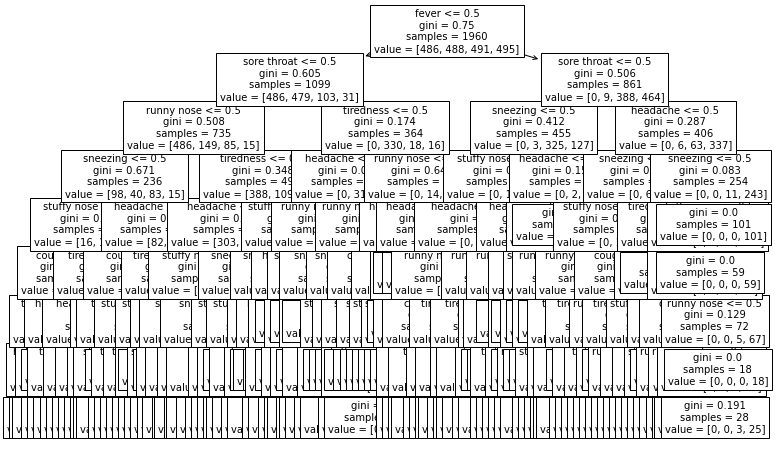

In [5]:


from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
my_tree=diagnose_v4(train_data) # train a model
print(my_tree.classes_) # print the possible target labels (diagnoses)
plt.figure(figsize=(12,8)) # size of the visualization, in inches
# plot the tree
plot_tree(my_tree,
            max_depth=10,
            fontsize=10,
            feature_names=medical_dataset.columns[:-1]
)

In [6]:



from sklearn.metrics import accuracy_score,confusion_matrix

test_patient_symptoms=test_data.drop(columns=['diagnosis'])

# get the diagnosis column, to be used as the classification target
test_diagnoses=test_data['diagnosis']

# guess the most likely diagnoses
pred=my_tree.predict(test_patient_symptoms)
print(pred)
# print the achieved accuracy score
accuracy_score(test_diagnoses,pred)

['covid19' 'covid19' 'allergies' 'covid19' 'allergies' 'allergies'
 'common cold' 'allergies' 'common cold' 'covid19' 'allergies' 'flu'
 'covid19' 'covid19' 'flu' 'common cold' 'covid19' 'allergies'
 'common cold' 'allergies' 'allergies' 'allergies' 'flu' 'common cold'
 'allergies' 'allergies' 'covid19' 'common cold' 'flu' 'common cold'
 'allergies' 'allergies' 'flu' 'allergies' 'allergies' 'covid19'
 'allergies' 'covid19' 'covid19' 'covid19']


0.75

In [7]:
confusion_matrix(test_diagnoses,pred)

array([[12,  1,  1,  0],
       [ 4,  6,  0,  2],
       [ 0,  0,  9,  0],
       [ 0,  0,  2,  3]], dtype=int64)